# Secondary Completion Rates

Zahraa Tanana
z5487528
CODE1161


In [51]:
import matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime


In [52]:
%matplotlib inline

In [53]:
plt.rcParams["figure.figsize"] = (10, 5)


In [54]:
saved_style_state = matplotlib.rcParams.copy()

In [55]:
Secondary_completion_rates = pd.read_csv("Secondary completion rates.csv", skiprows=1)
print("done")

done


In [56]:
Secondary_completion_rates.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUT,GRADRATE,UPPSRY,PC,A,2010,84.210,NaN
1,AUT,GRADRATE,UPPSRY,PC,A,2011,83.621,NaN
2,AUT,GRADRATE,UPPSRY,PC,A,2012,84.955,NaN
3,AUT,GRADRATE,UPPSRY,PC,A,2013,83.765,NaN
4,AUT,GRADRATE,UPPSRY,PC,A,2014,83.544,NaN


In [57]:
Secondary_completion_rates.sample(5)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
1184,ISL,GRADRATE,P_SRY_NTRY,PC,A,2014,4.314,NaN
1421,SVK,GRADRATE,P_SRY_NTRY,PC,A,2016,5.266,NaN
192,DEU,GRADRATE,UPPSRY_WOMEN,PC,A,2017,77.745,NaN
124,DNK,GRADRATE,UPPSRY_MEN,PC,A,2015,75.770,NaN
276,ISL,GRADRATE,UPPSRY_WOMEN,PC,A,2020,87.960,NaN


In [58]:
Secondary_completion_rates.columns

Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME',
       'Value', 'Flag Codes'],
      dtype='object')

In [59]:
row_one = Secondary_completion_rates.iloc[1]
row_one

LOCATION           AUT
INDICATOR     GRADRATE
SUBJECT         UPPSRY
MEASURE             PC
FREQUENCY            A
TIME              2011
Value           83.621
Flag Codes         NaN
Name: 1, dtype: object

In [60]:
row_one = ["Value"]

In [61]:
Secondary_completion_rates.Value

0       84.210
1       83.621
2       84.955
3       83.765
4       83.544
         ...  
1757    81.416
1758    82.614
1759    83.794
1760    83.810
1761    85.871
Name: Value, Length: 1762, dtype: float64

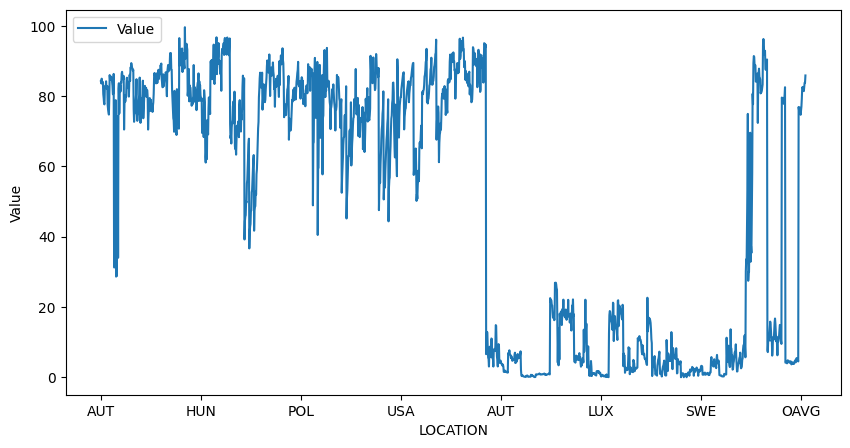

In [62]:

Secondary_completion_rates_sorted = Secondary_completion_rates.sort_values(by='LOCATION')
Secondary_completion_rates.plot(x='LOCATION', y='Value')
plt.xlabel("LOCATION")
plt.ylabel("Value")
plt.show()

Text(0, 0.5, 'Value')

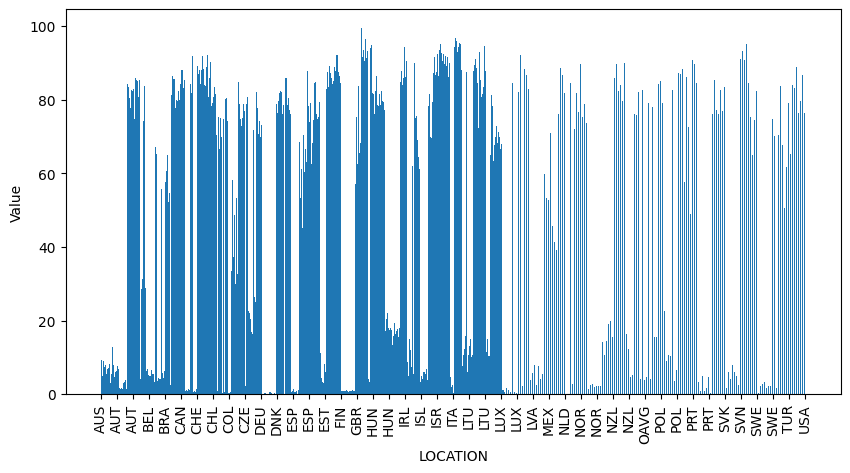

In [63]:

Secondary_completion_rates_sorted = Secondary_completion_rates.sort_values(by='LOCATION')
plt.bar(range(len(Secondary_completion_rates_sorted['LOCATION'])), Secondary_completion_rates_sorted['Value'])
step =40
plt.xticks(range(0, len(Secondary_completion_rates_sorted['LOCATION']), step), 
        Secondary_completion_rates_sorted['LOCATION'][::step], rotation=90)
plt.xlabel("LOCATION")
plt.ylabel("Value")

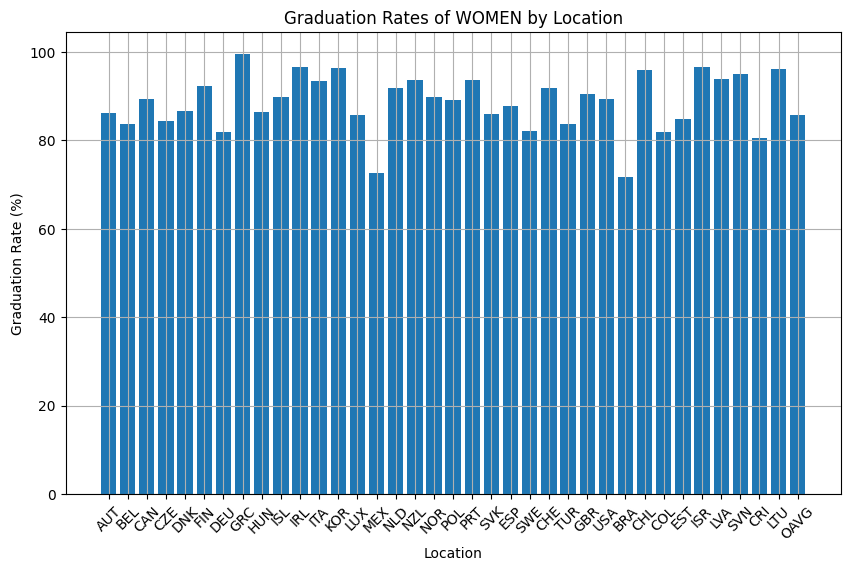

In [64]:

filtered_Secondary_completion_rates = Secondary_completion_rates[Secondary_completion_rates['SUBJECT'] == 'UPPSRY_WOMEN']
plt.figure(figsize=(10, 6))
plt.bar(filtered_Secondary_completion_rates['LOCATION'], filtered_Secondary_completion_rates['Value'])
plt.title('Graduation Rates of WOMEN by Location')
plt.xlabel('Location')
plt.ylabel('Graduation Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

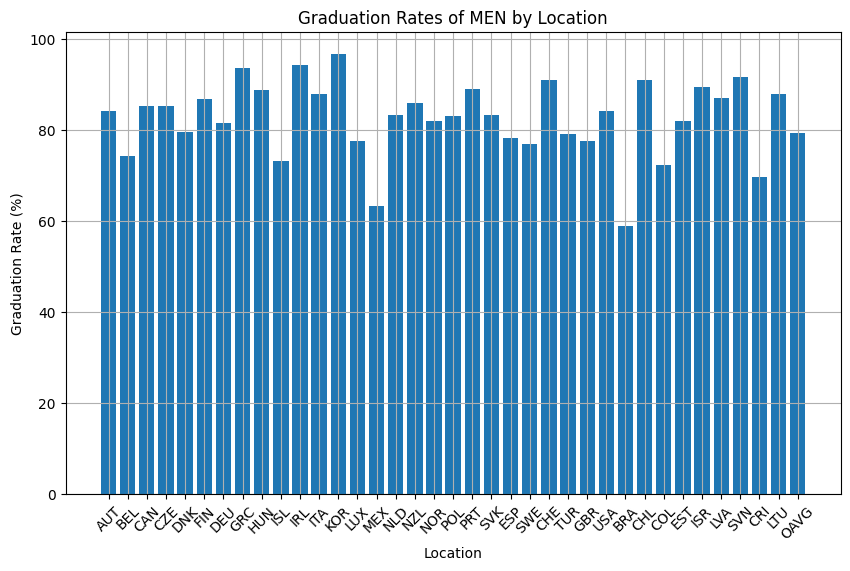

In [65]:
filtered_Secondary_completion_rates = Secondary_completion_rates[Secondary_completion_rates['SUBJECT'] == 'UPPSRY_MEN']
plt.figure(figsize=(10, 6))
plt.bar(filtered_Secondary_completion_rates['LOCATION'], filtered_Secondary_completion_rates['Value'])
plt.title('Graduation Rates of MEN by Location')
plt.xlabel('Location')
plt.ylabel('Graduation Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

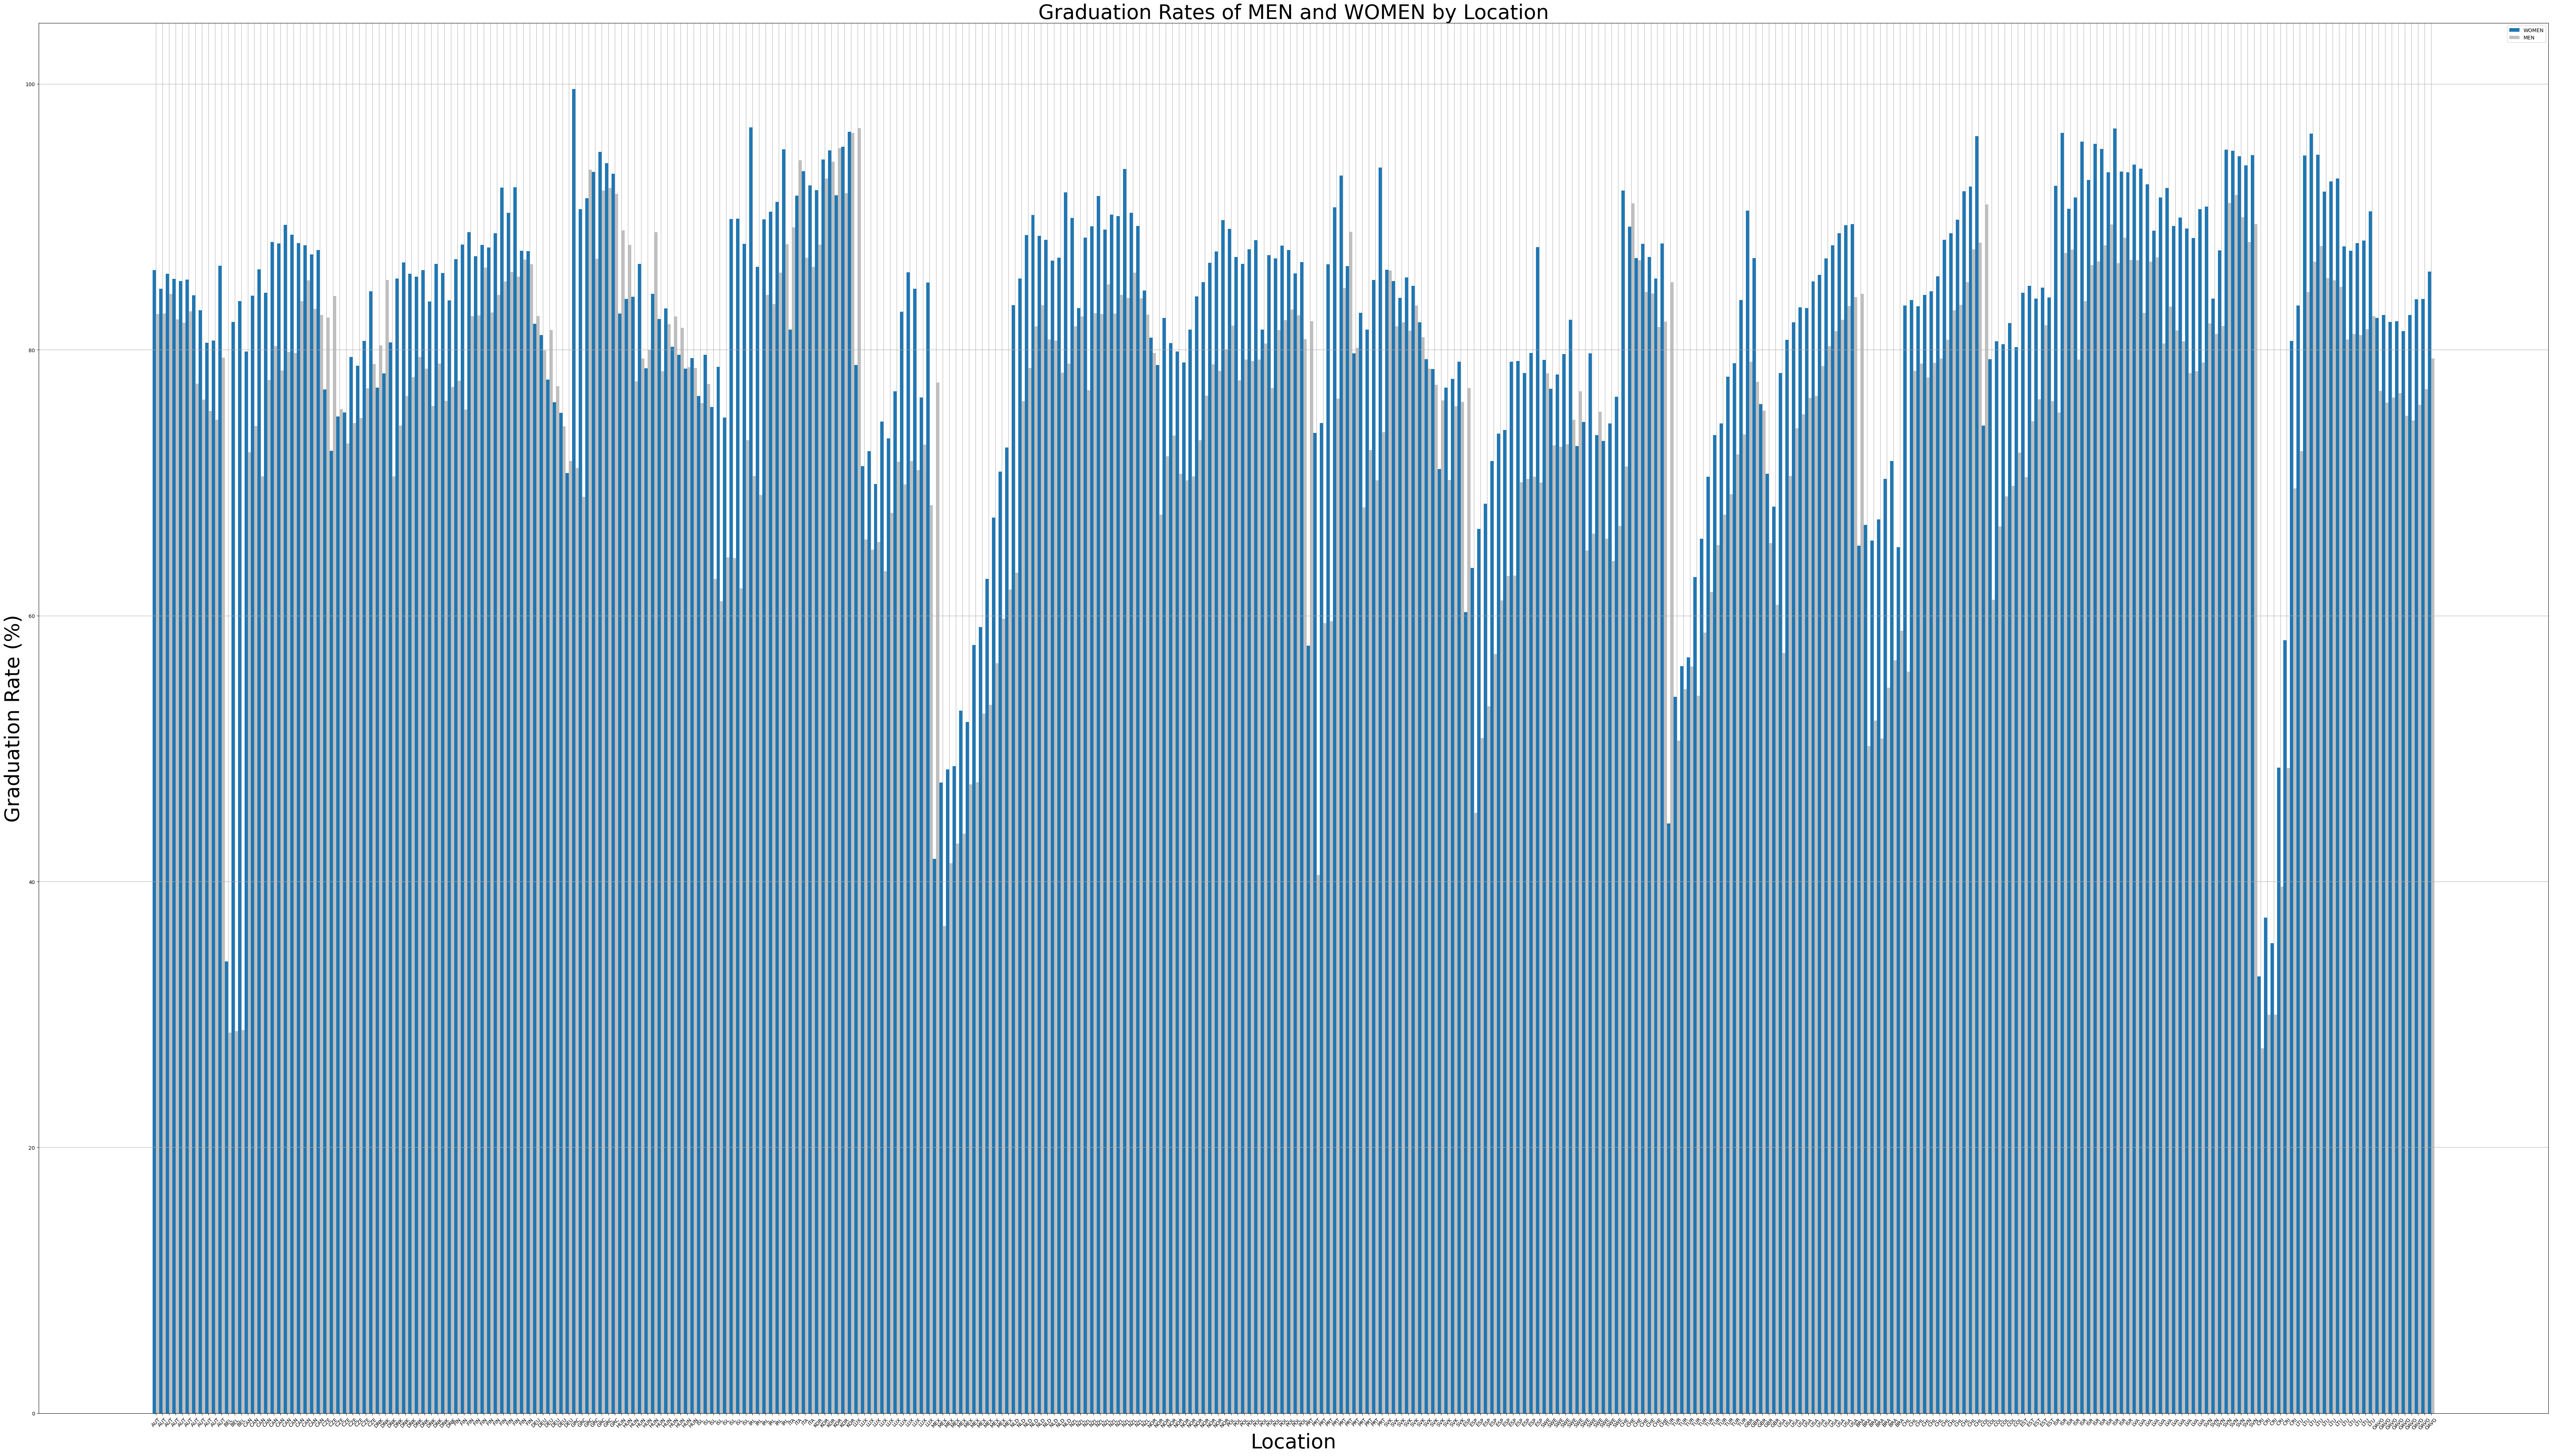

In [66]:
filtered_men = Secondary_completion_rates[Secondary_completion_rates['SUBJECT'] == 'UPPSRY_MEN']
filtered_women = Secondary_completion_rates[Secondary_completion_rates['SUBJECT'] == 'UPPSRY_WOMEN']
plt.figure(figsize=(70, 40))
bar_width = 0.5
locations = np.arange(len(filtered_women['LOCATION']))
plt.bar(locations, filtered_women['Value'], width=bar_width,label='WOMEN')
plt.bar(locations + bar_width, filtered_men['Value'], width=bar_width, label='MEN', color='grey', alpha=0.5)
plt.title('Graduation Rates of MEN and WOMEN by Location', fontsize=40)
plt.xlabel('Location', fontsize=40)
plt.ylabel('Graduation Rate (%)', fontsize=40)
plt.xticks(locations + bar_width / 2, filtered_women['LOCATION'], rotation=45)
plt.xticks(fontsize=10)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

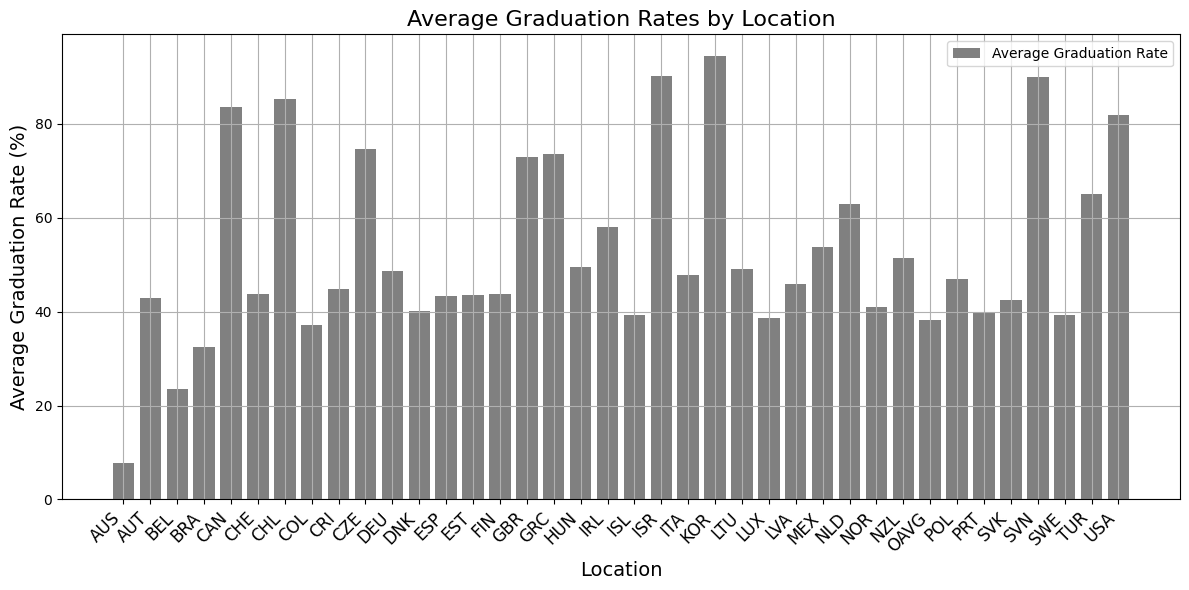

In [67]:

avg_rates = Secondary_completion_rates.groupby('LOCATION')['Value'].mean()
plt.figure(figsize=(12, 6))
plt.bar(avg_rates.index, avg_rates.values, color='grey', label='Average Graduation Rate')
plt.title('Average Graduation Rates by Location', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Average Graduation Rate (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

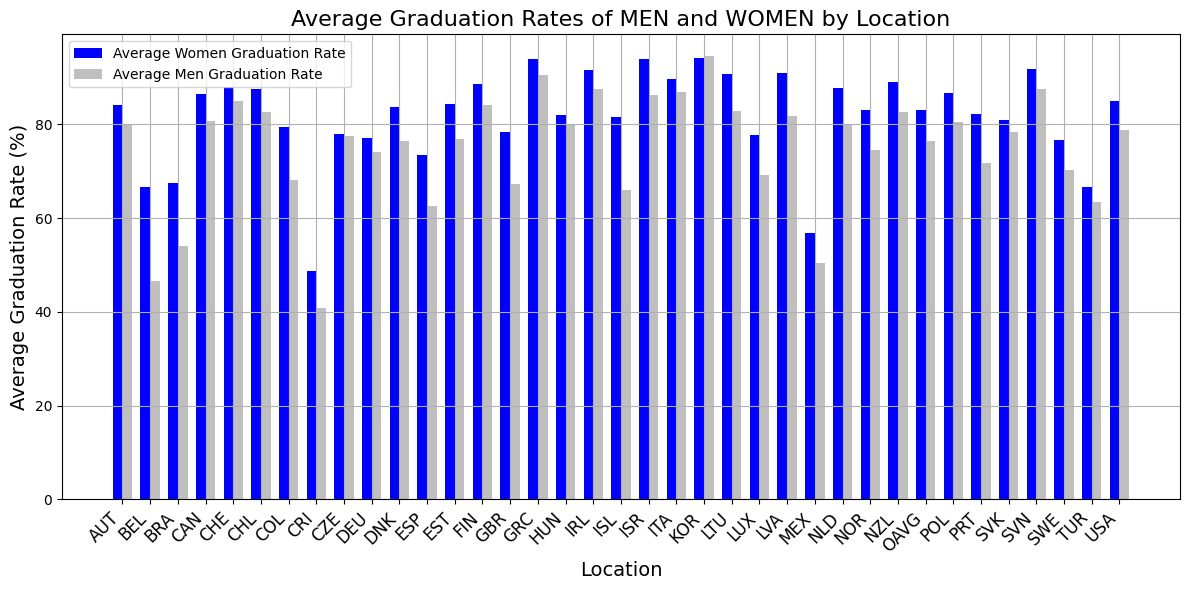

In [68]:

filtered_men = Secondary_completion_rates[Secondary_completion_rates['SUBJECT'] == 'UPPSRY_MEN']
filtered_women = Secondary_completion_rates[Secondary_completion_rates['SUBJECT'] == 'UPPSRY_WOMEN']
avg_rates_men = filtered_men.groupby('LOCATION')['Value'].mean()
avg_rates_women = filtered_women.groupby('LOCATION')['Value'].mean()
plt.figure(figsize=(12, 6))
bar_width = 0.35
locations = np.arange(len(avg_rates_women.index))
plt.bar(locations, avg_rates_women.values, width=bar_width, label='Average Women Graduation Rate', color='blue')
plt.bar(locations + bar_width, avg_rates_men.values, width=bar_width, label='Average Men Graduation Rate', color='grey', alpha=0.5)
plt.title('Average Graduation Rates of MEN and WOMEN by Location', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Average Graduation Rate (%)', fontsize=14)
plt.xticks(locations + bar_width / 2, avg_rates_women.index, rotation=45, ha='right', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/xq/609_wygj557556v1lb5c15jr0000gn/T/ipykernel_89989/1004185950.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


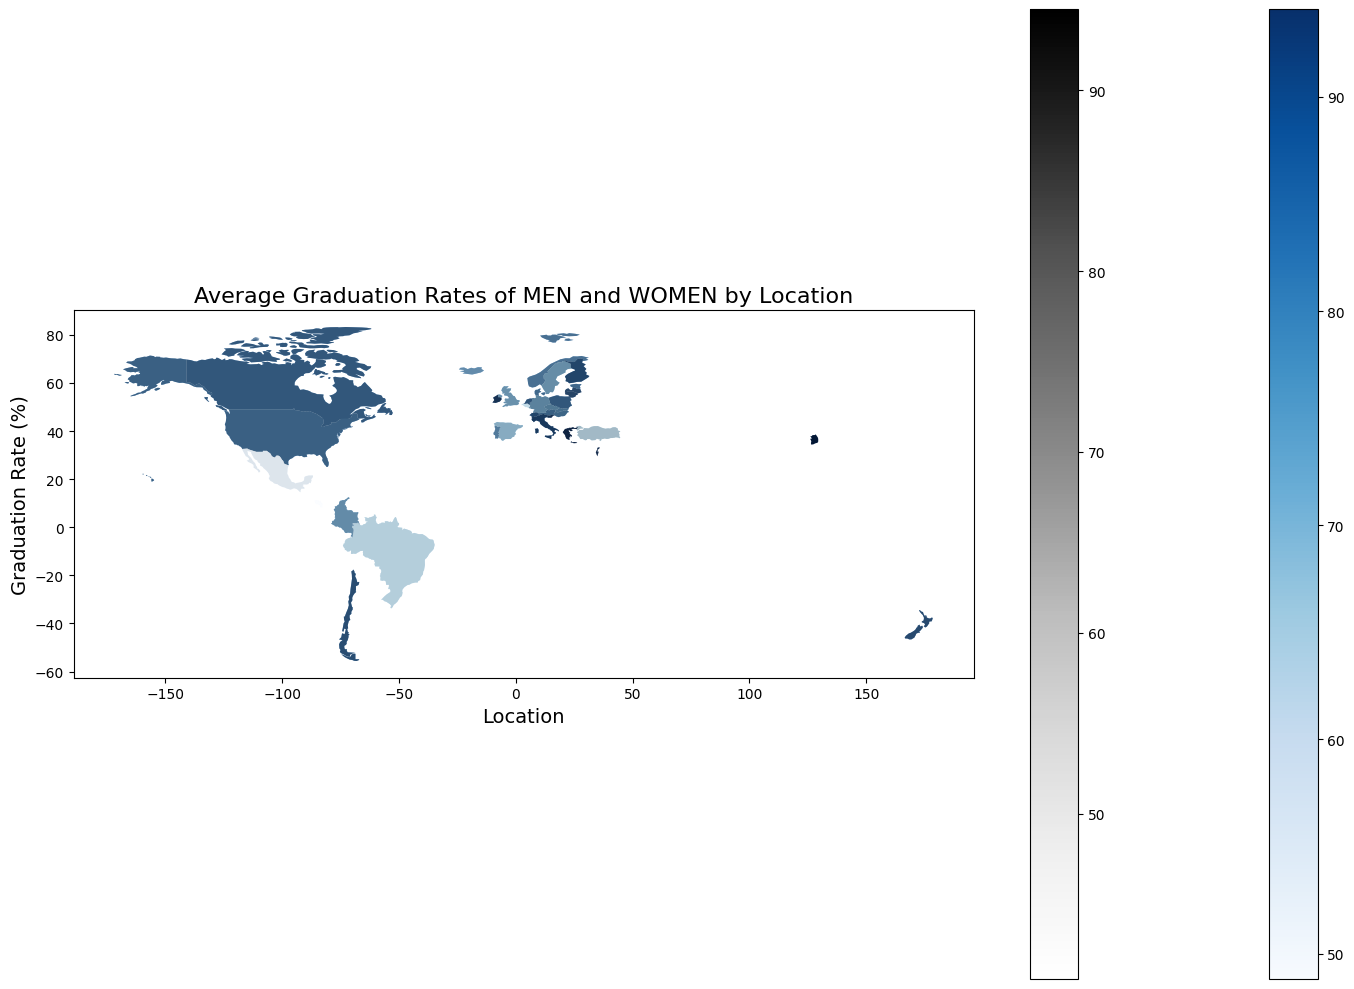

In [69]:

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
filtered_men = Secondary_completion_rates[Secondary_completion_rates['SUBJECT'] == 'UPPSRY_MEN']
filtered_women = Secondary_completion_rates[Secondary_completion_rates['SUBJECT'] == 'UPPSRY_WOMEN']
avg_rates_men = filtered_men.groupby('LOCATION')['Value'].mean()
avg_rates_women = filtered_women.groupby('LOCATION')['Value'].mean()
world = world.merge(avg_rates_women, left_on='iso_a3', right_index=True)
world = world.merge(avg_rates_men, left_on='iso_a3', right_index=True, suffixes=('_women', '_men'))
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='Value_women', cmap='Blues', ax=ax, legend=True)
world.plot(column='Value_men', cmap='Greys', ax=ax, alpha=0.5, legend=True)

plt.title('Average Graduation Rates of MEN and WOMEN by Location', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Graduation Rate (%)', fontsize=14)
plt.xticks(fontsize=10)

plt.tight_layout()
plt.show()


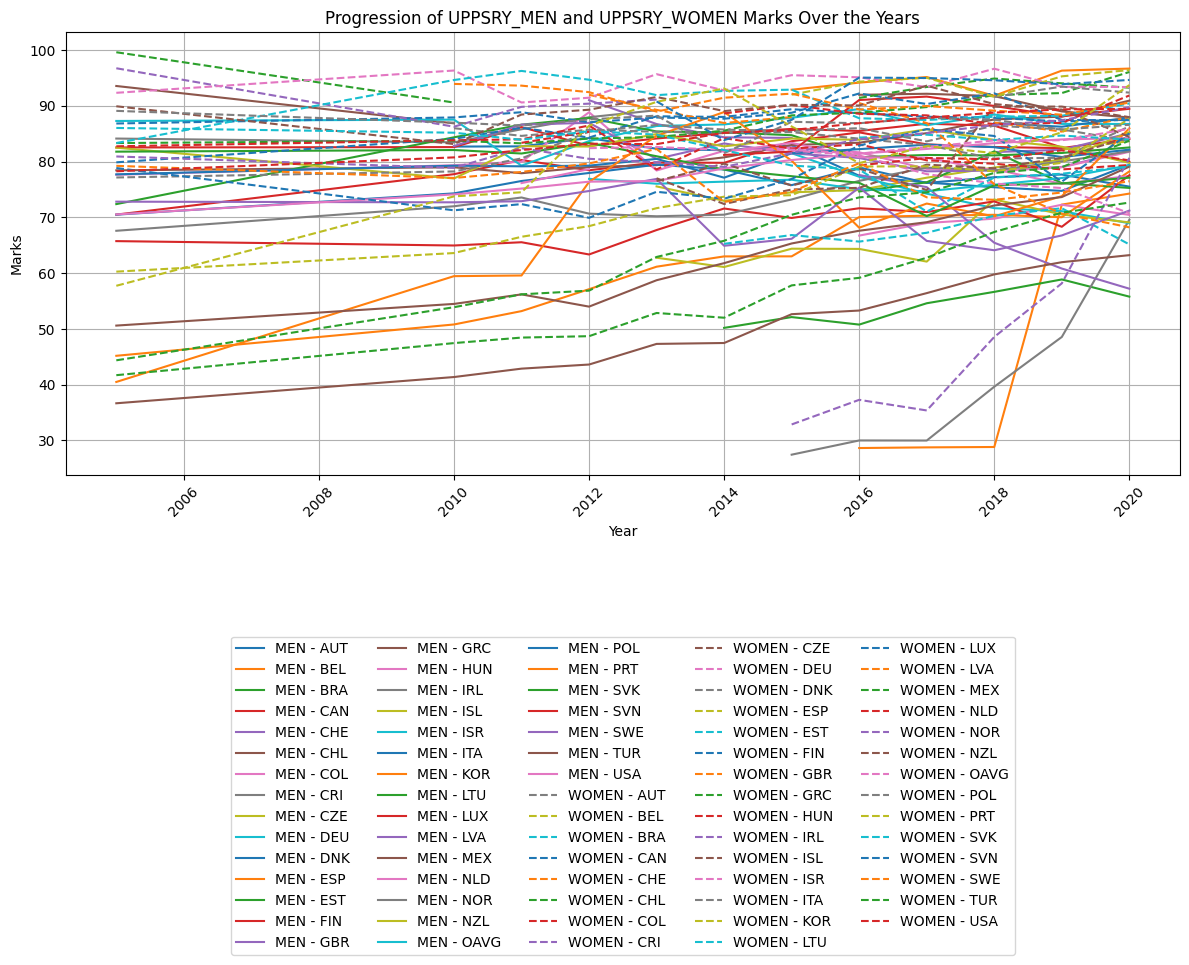

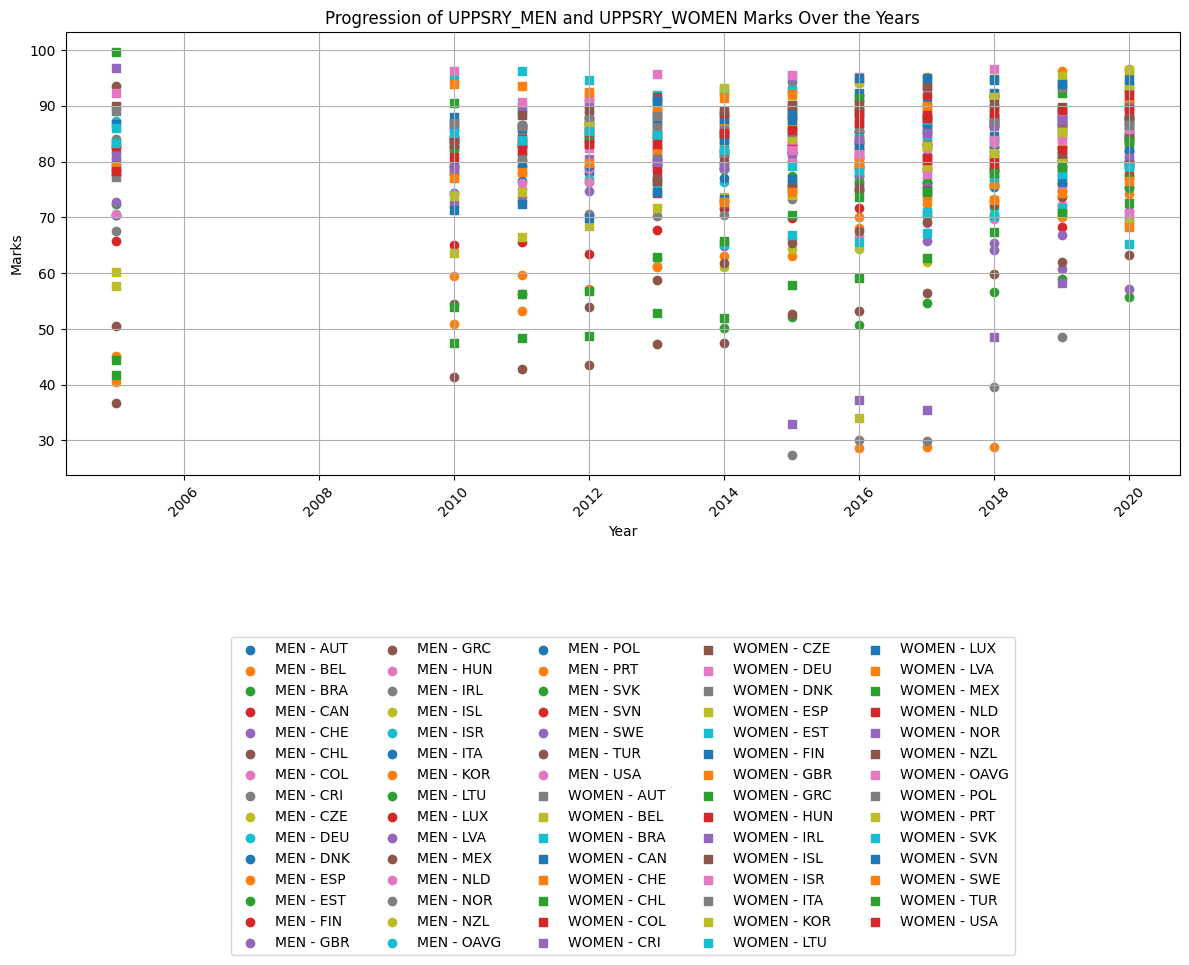

In [72]:

filtered_men = Secondary_completion_rates[Secondary_completion_rates['SUBJECT'] == 'UPPSRY_MEN']
filtered_women = Secondary_completion_rates[Secondary_completion_rates['SUBJECT'] == 'UPPSRY_WOMEN']
pivoted_men = filtered_men.pivot(index='TIME', columns='LOCATION', values='Value')
pivoted_women = filtered_women.pivot(index='TIME', columns='LOCATION', values='Value')
plt.figure(figsize=(12, 6))
for column in pivoted_men.columns:
    plt.plot(pivoted_men.index, pivoted_men[column], label=f'MEN - {column}')
for column in pivoted_women.columns:
    plt.plot(pivoted_women.index, pivoted_women[column], label=f'WOMEN - {column}', linestyle='dashed')
plt.title('Progression of UPPSRY_MEN and UPPSRY_WOMEN Marks Over the Years')
plt.xlabel('Year')
plt.ylabel('Marks')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.35), ncol=5)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()


filtered_men = Secondary_completion_rates[Secondary_completion_rates['SUBJECT'] == 'UPPSRY_MEN']
filtered_women = Secondary_completion_rates[Secondary_completion_rates['SUBJECT'] == 'UPPSRY_WOMEN']
pivoted_men = filtered_men.pivot(index='TIME', columns='LOCATION', values='Value')
pivoted_women = filtered_women.pivot(index='TIME', columns='LOCATION', values='Value')
plt.figure(figsize=(12, 6))
for column in pivoted_men.columns:
    plt.scatter(pivoted_men.index, pivoted_men[column], label=f'MEN - {column}', marker='o')
for column in pivoted_women.columns:
    plt.scatter(pivoted_women.index, pivoted_women[column], label=f'WOMEN - {column}', marker='s')
plt.title('Progression of UPPSRY_MEN and UPPSRY_WOMEN Marks Over the Years')
plt.xlabel('Year')
plt.ylabel('Marks')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.35), ncol=5)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

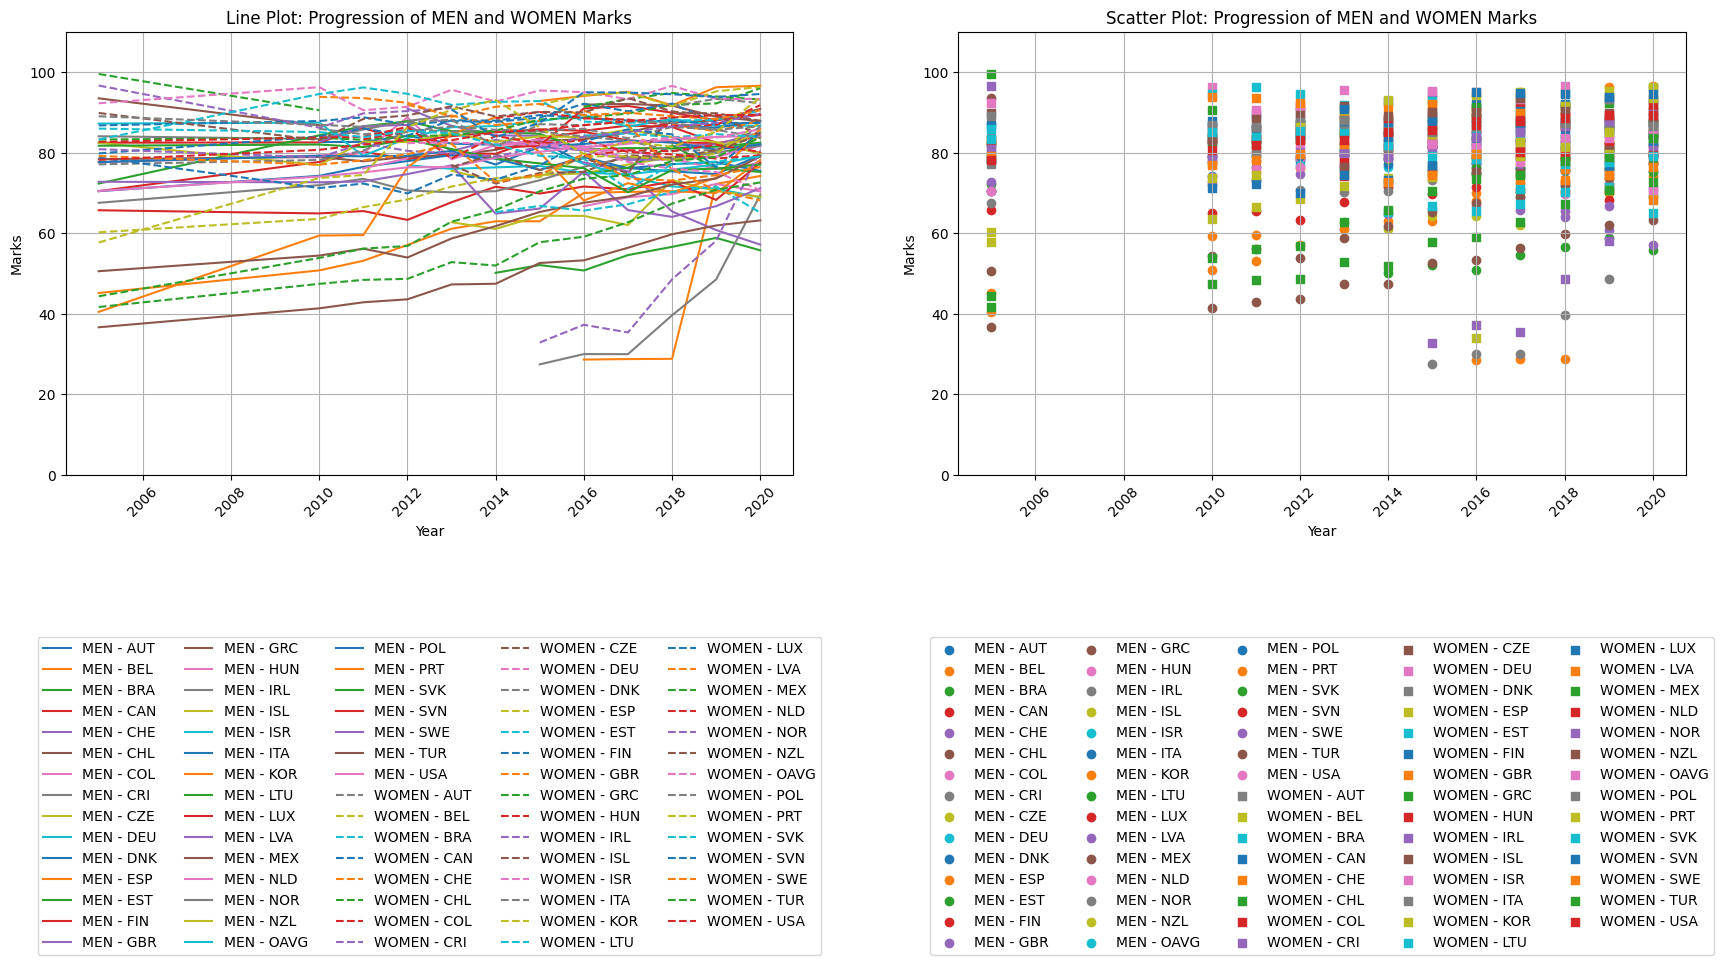

In [77]:
filtered_men = Secondary_completion_rates[Secondary_completion_rates['SUBJECT'] == 'UPPSRY_MEN']
filtered_women = Secondary_completion_rates[Secondary_completion_rates['SUBJECT'] == 'UPPSRY_WOMEN']
pivoted_men = filtered_men.pivot(index='TIME', columns='LOCATION', values='Value')
pivoted_women = filtered_women.pivot(index='TIME', columns='LOCATION', values='Value')

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

axs[0].set_title('Line Plot: Progression of MEN and WOMEN Marks')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Marks')
for column in pivoted_men.columns:
    axs[0].plot(pivoted_men.index, pivoted_men[column], label=f'MEN - {column}')
for column in pivoted_women.columns:
    axs[0].plot(pivoted_women.index, pivoted_women[column], label=f'WOMEN - {column}', linestyle='dashed')
axs[0].grid(True)
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.35), ncol=5)
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_ylim(0, 110) 

axs[1].set_title('Scatter Plot: Progression of MEN and WOMEN Marks')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Marks')
for column in pivoted_men.columns:
    axs[1].scatter(pivoted_men.index, pivoted_men[column], label=f'MEN - {column}', marker='o')
for column in pivoted_women.columns:
    axs[1].scatter(pivoted_women.index, pivoted_women[column], label=f'WOMEN - {column}', marker='s')
axs[1].grid(True)
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.35), ncol=5)
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_ylim(0, 110)

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

I've noticed in my dataset that there is a country code OAVG but when I go to search up what that country code stands for, their is no country with that name. Also under my subject column, I have some countries with P_SRY_NTRY that doesn't seem to stand for anything at all, and nothing comes up when I research it.

Somethings I could further my research on would be why some countries have UPPSRY_MEN and, UPPSRY_WOMEN but also just UPPSRY. as well as why there is missing data for 2006-2008 (some countries have 2005 but, not all)